<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center">


<br>

<p>

**Machine Learning**

10204350

H/618/7438

Section (1)

**Assignment 2 ML Project**

**Submitted to**

Dr. Rami Al Ouran

**Submitted on**

January 30th, 2024

**Submitted by**

Marwan Tarek Shafiq Al Farah

**Student ID**

21110011

Fall 2023 – 2024
</p></center>

# **Importing Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# **Loading the Dataset**

In [2]:
df = pd.read_csv('Occupancy_Estimation.csv')
df

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0            34        53        40      0.08      0.19      0.06      0.06   
1            33        53        40      0.93      0.05      0.06      0.06   
2            34        53        40      0.43      0.11      0.08      0.06   
3            34        53        40      0.41      0.10      0.10      0.09   
4            34        54        40      0.18      0.06      0.06      0.06   
...         ...       ...       ...       ...       ...       ...       ...   
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0         390      0.769231       0       0                     1  
1         390      0.646154       0       0                     1  
2         390      0.519231       0       0                     1  
3         390      0.388462       0       0                     1  
4         390      0.253846       0       0                     1  
...       ...           ...     ...     ...                   ...  
10124     345      0.000000       0       0                     0  
10125     345      0.000000       0       0                     0  
10126     345      0.000000       0       0                     0  
10127     345      0.000000       0       0                     0  
10128     345      0.000000       0       0                     0  

[10129 rows x 19 columns]

# **EDA**

In [5]:
df.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  Room_Occupancy_Count  
count  10129.000000          10129.000000  
mean       0.079574              0.398559  
std        0.270645              0.893633  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              0.000000  
75%        0.000000              0.000000  
max        1.000000              3.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

With the use of df.info() and df.describe(), statistical summaries for each sensor's readings, including mean, standard deviation, minimum and maximum values, and various percentiles, provide a foundational understanding of the data's distribution and variability. Also, they also helped us identify the data types of each feature, along with checking for any null values.

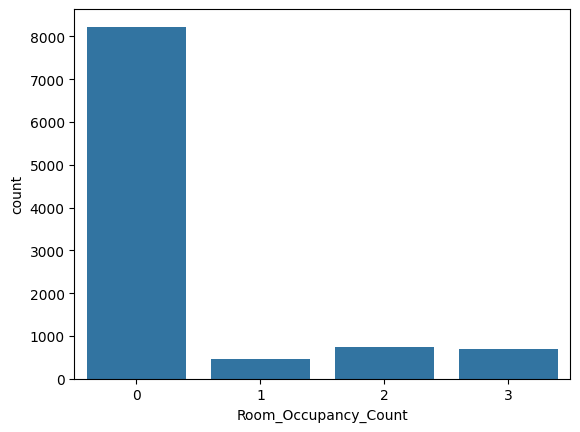

In [13]:
sns.countplot(data = df, x = 'Room_Occupancy_Count')
plt.show()

We used a bar chart to visualize out target variable “Room Occupancy Count”, and found out that the dataset is imbalanced, and that most data points are when the count was 0.

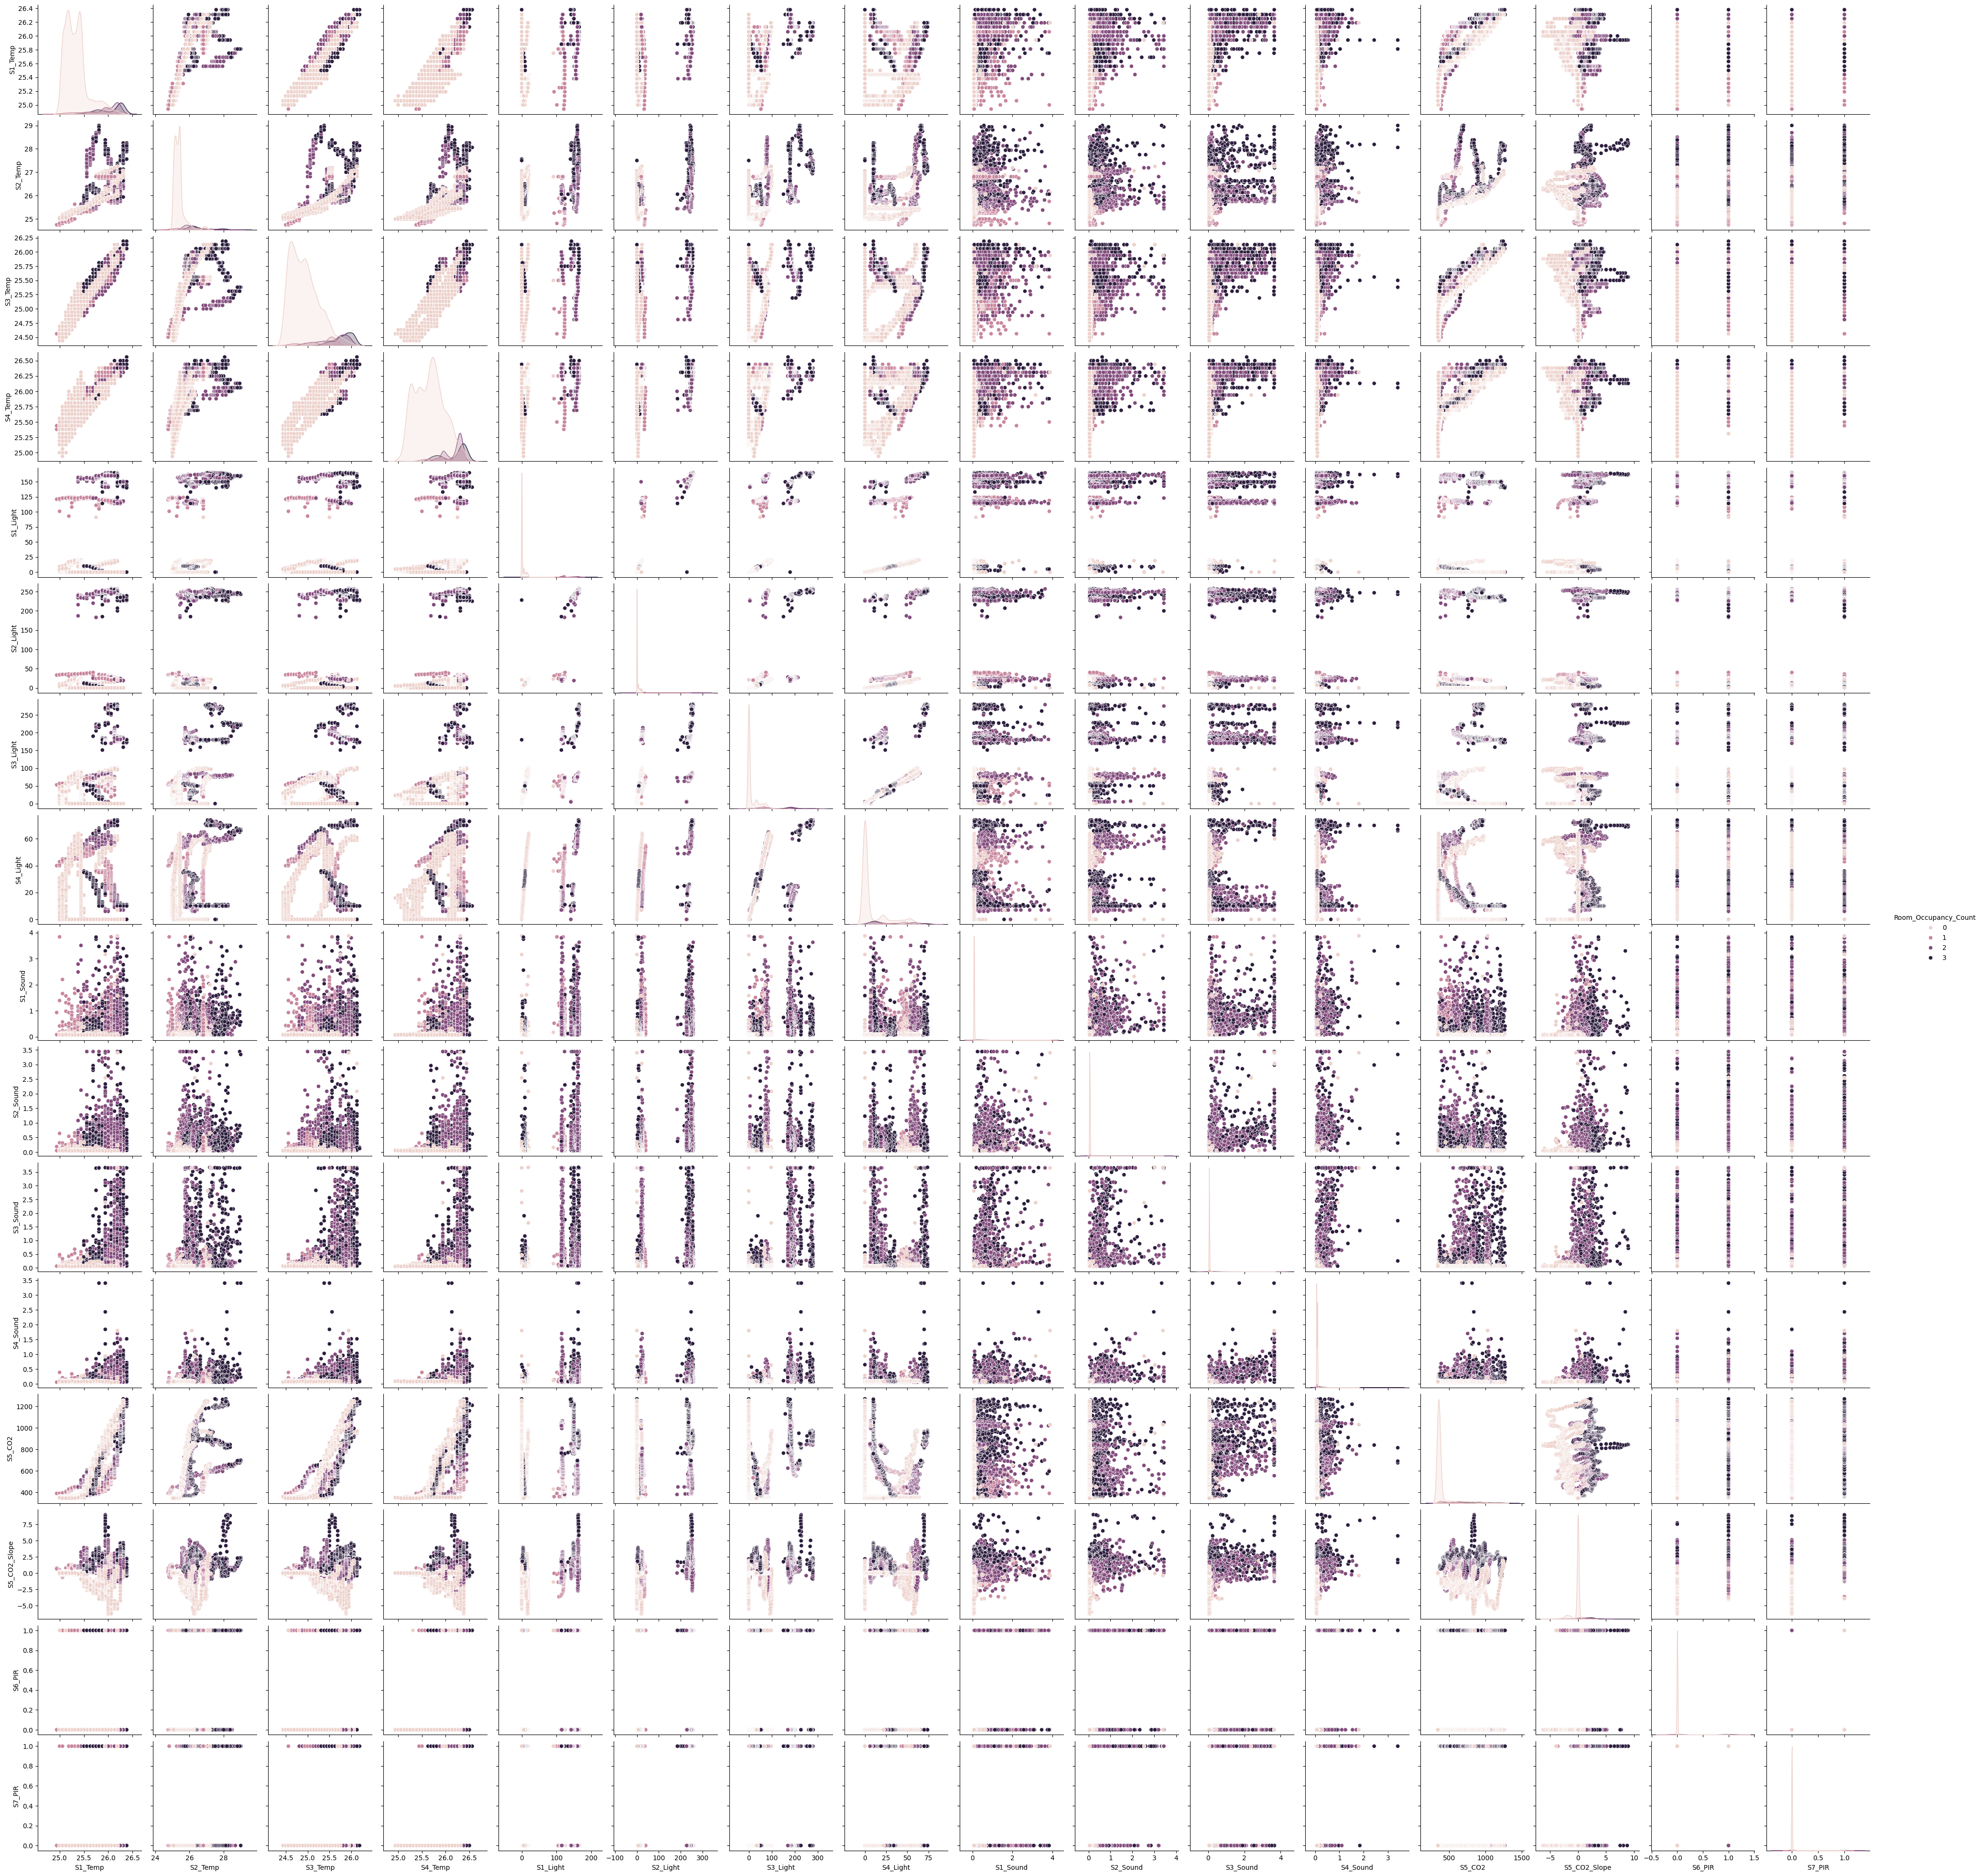

In [12]:
sns.pairplot(df.drop(['Date', 'Time'], axis = 1), hue = "Room_Occupancy_Count")
plt.show()

As can be seen from this pairplot, most of the points are scattered randomly, but S1_temp, S2_temp, and S4_temp seem to have a near linear relationship. Additionally, in a chart that has any combination of 2 of these three sensors, we can see that a lower reading on both of the sensors, usually indicated a less occupied room.

In [ ]:
DateTime_Before = pd.to_datetime(df[df['Date'] <= '2017/12/26']['Date'] + ' ' + df[df['Date'] <= '2017/12/26']['Time'])
DateTime_After = pd.to_datetime(df[df['Date'] > '2017/12/26']['Date'] + ' ' + df[df['Date'] > '2017/12/26']['Time'])

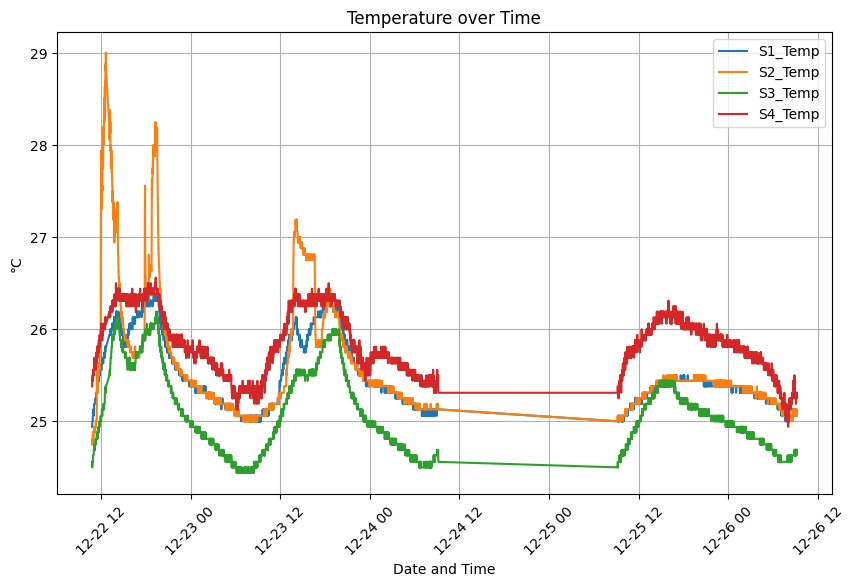

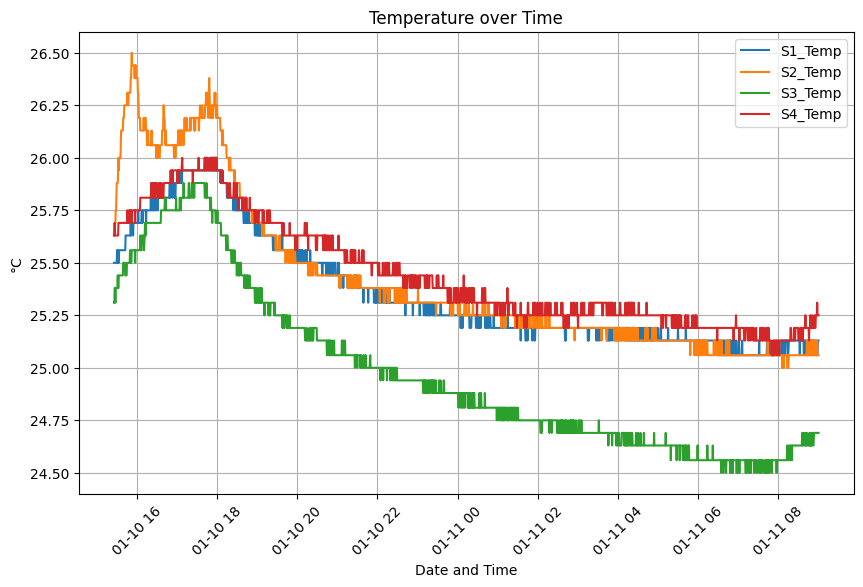

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S1_Temp'], label = 'S1_Temp')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S2_Temp'], label = 'S2_Temp')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S3_Temp'], label = 'S3_Temp')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S4_Temp'], label = 'S4_Temp')
plt.xlabel('Date and Time')
plt.ylabel('°C')
plt.title('Temperature over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S1_Temp'], label = 'S1_Temp')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S2_Temp'], label = 'S2_Temp')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S3_Temp'], label = 'S3_Temp')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S4_Temp'], label = 'S4_Temp')
plt.xlabel('Date and Time')
plt.ylabel('°C')
plt.title('Temperature over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

These charts confirm our conclusion from the pairplot, as we can see S1_temp, S3_temp and S4_temp being very close to each other, while S2_temp having very different results from the other 3 of them.

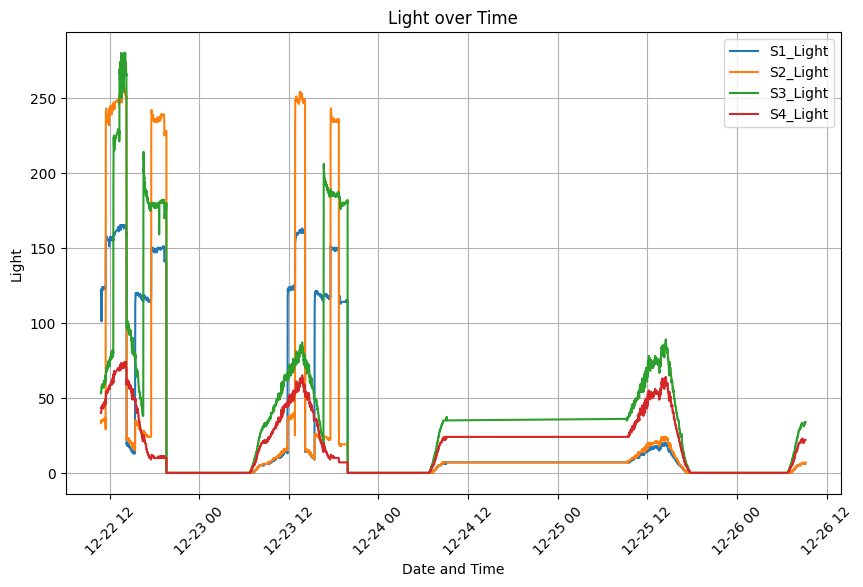

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S1_Light'], label = 'S1_Light')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S2_Light'], label = 'S2_Light')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S3_Light'], label = 'S3_Light')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S4_Light'], label = 'S4_Light')
plt.xlabel('Date and Time')
plt.ylabel('Light')
plt.title('Light over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S1_Light'], label = 'S1_Light')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S2_Light'], label = 'S2_Light')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S3_Light'], label = 'S3_Light')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S4_Light'], label = 'S4_Light')
plt.xlabel('Date and Time')
plt.ylabel('Light')
plt.title('Light over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

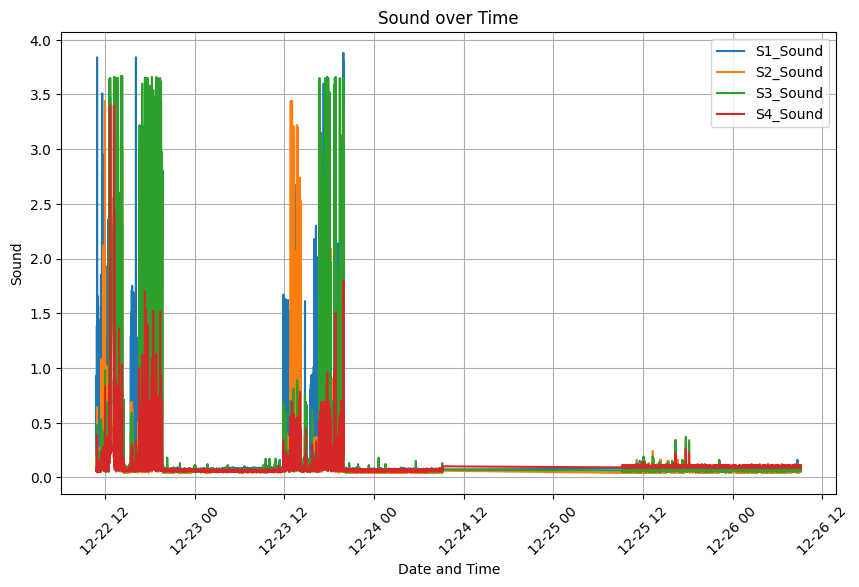

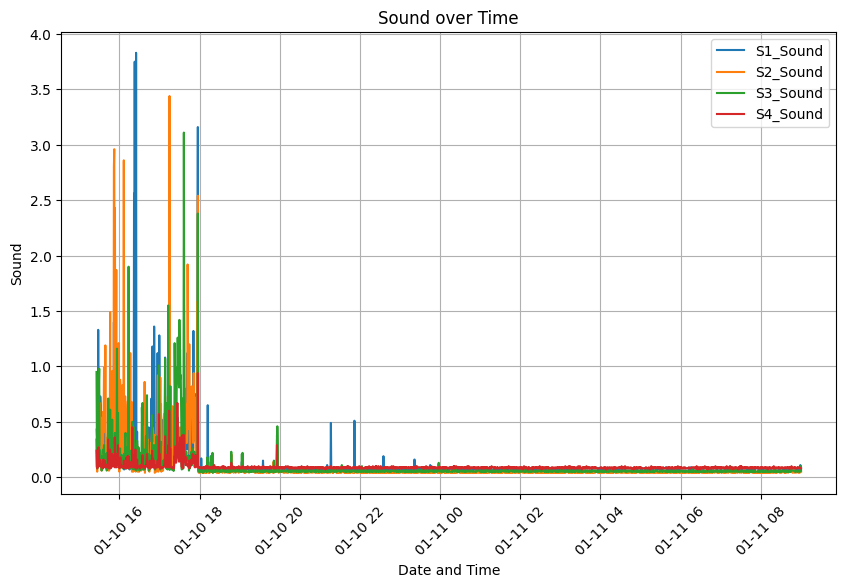

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S1_Sound'], label = 'S1_Sound')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S2_Sound'], label = 'S2_Sound')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S3_Sound'], label = 'S3_Sound')
plt.plot(DateTime_Before, df[df['Date'] <= '2017/12/26']['S4_Sound'], label = 'S4_Sound')
plt.xlabel('Date and Time')
plt.ylabel('Sound')
plt.title('Sound over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S1_Sound'], label = 'S1_Sound')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S2_Sound'], label = 'S2_Sound')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S3_Sound'], label = 'S3_Sound')
plt.plot(DateTime_After, df[df['Date'] > '2017/12/26']['S4_Sound'], label = 'S4_Sound')
plt.xlabel('Date and Time')
plt.ylabel('Sound')
plt.title('Sound over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

As can be seen from both the light and sound sensors, they do not have a strong correlation between each other, and we cannot draw any conclusions based on their behaviors.

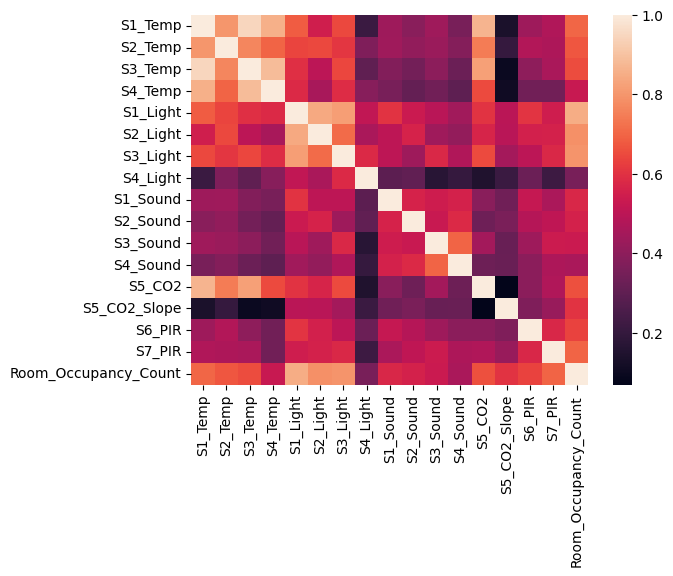

In [4]:
sns.heatmap(df.drop(['Date', 'Time'], axis = 1).corr())
plt.show()

The correlation heatmap further confirms that the strongest correlation in the features can be observed between S1_temp and S3_temp, followed by S1_temp and S4_temp along with S3_temp and S4_temp.

# **Data Preprocessing**

In [3]:
X = df.drop('Room_Occupancy_Count', axis = 1)
y = df['Room_Occupancy_Count']

In [4]:
X['Time'] = X['Time'].apply(lambda x: np.dot(np.array(list(map(int, x.split(':')))), np.array([3600, 60, 1])))

In [5]:
label_encoder = LabelEncoder()
X['Date'] = label_encoder.fit_transform(X['Date'])

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Function for Model Evaluation**

In [8]:
def evaluate_predictions(y_true, y_pred, average = 'macro'):
    return accuracy_score(y_true, y_pred), precision_score(y_true, y_pred, average = average), recall_score(y_true, y_pred, average = average), f1_score(y_true, y_pred, average = average)

# **Machine Learning Models**

## **Random Forest**

In [ ]:
rf_params = {
    'n_estimators': [20, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

In [ ]:
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, verbose=3)
rf_grid.fit(X_train, y_train)
rf_predictions_test = rf_grid.best_estimator_.predict(X_test)
rf_metrics_test = evaluate_predictions(y_test, rf_predictions_test)
rf_predictions_train = rf_grid.best_estimator_.predict(X_train)
rf_metrics_train = evaluate_predictions(y_train, rf_predictions_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20;, score=0.993 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20;, score=0.994 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20;, score=0.993 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20;, score=0.994 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20;, score=0.993 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.994 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.994 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.993 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqr

In [ ]:
print("Best parameters for Random Forest:", rf_grid.best_params_)
print()
print("Random Forest Metrics (Accuracy, Precision, Recall, F1):", rf_metrics_test)
print("Random Forest Train Metrics (Accuracy, Precision, Recall, F1):", rf_metrics_train)
print()
print("Confusion Martix:\n")
print(confusion_matrix(y_test, rf_predictions_test))

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 20}

Random Forest Metrics (Accuracy, Precision, Recall, F1): (0.9990128331688055, 0.9960717636022514, 0.9966898954703833, 0.9963718229398283)
Random Forest Train Metrics (Accuracy, Precision, Recall, F1): (0.999382944588424, 0.997845158949317, 0.9970139126972793, 0.9974234448292026)

Confusion Martix:

[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  163    0]
 [   0    0    1  139]]


## **XGBoost**

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [20, 50, 100]
}

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, verbose=3)
xgb_grid.fit(X_train, y_train)
xgb_predictions_test = xgb_grid.best_estimator_.predict(X_test)
xgb_metrics_test = evaluate_predictions(y_test, xgb_predictions_test)
xgb_predictions_train = xgb_grid.best_estimator_.predict(X_train)
xgb_metrics_train = evaluate_predictions(y_train, xgb_predictions_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=20;, score=0.993 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=20;, score=0.992 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=20;, score=0.990 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=20;, score=0.994 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=20;, score=0.991 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50;, score=0.994 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50;, score=0.991 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50;, score=0.990 total time=   0.2s
[CV 4/5] END learn

In [ ]:
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print()
print("XGBoost Metrics (Accuracy, Precision, Recall, F1):", xgb_metrics_test)
print("XGBoost Train Metrics (Accuracy, Precision, Recall, F1):", xgb_metrics_train)
print()
print("Confusion Martix:\n")
print(confusion_matrix(y_test, xgb_predictions_test))

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50}

XGBoost Metrics (Accuracy, Precision, Recall, F1): (0.9970384995064165, 0.9937752018881093, 0.989808362369338, 0.9917546471120644)
XGBoost Train Metrics (Accuracy, Precision, Recall, F1): (1.0, 1.0, 1.0, 1.0)

Confusion Martix:

[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   3    0    1  136]]


## **Gradient Boosting**

In [ ]:
gb_params = {
    'n_estimators': [20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, verbose=3)
gb_grid.fit(X_train, y_train)
gb_predictions_test = gb_grid.best_estimator_.predict(X_test)
gb_metrics_test = evaluate_predictions(y_test, gb_predictions_test)
gb_predictions_train = gb_grid.best_estimator_.predict(X_train)
gb_metrics_train = evaluate_predictions(y_train, gb_predictions_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.816 total time=   1.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.816 total time=   1.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.816 total time=   1.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.816 total time=   1.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=0.815 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.929 total time=   3.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.917 total time=   3.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.948 total time=   2.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.920 total time=   2.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.933 total t

In [ ]:
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print()
print("Gradient Boosting Metrics (Accuracy, Precision, Recall, F1):", gb_metrics_test)
print("Gradient Boosting Train Metrics (Accuracy, Precision, Recall, F1):", gb_metrics_train)
print()
print("Confusion Martix:\n")
print(confusion_matrix(y_test, gb_predictions_test))

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

Gradient Boosting Metrics (Accuracy, Precision, Recall, F1): (0.9970384995064165, 0.9924141042669978, 0.989808362369338, 0.9910765336768804)
Gradient Boosting Train Metrics (Accuracy, Precision, Recall, F1): (1.0, 1.0, 1.0, 1.0)

Confusion Martix:

[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   2    0    2  136]]


## **SVM**

In [9]:
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [10, 1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'linear']
}

In [10]:
svm_model = SVC()
svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, verbose=3)
svm_grid.fit(X_train, y_train)
svm_predictions_test = svm_grid.best_estimator_.predict(X_test)
svm_metrics_test = evaluate_predictions(y_test, svm_predictions_test)
svm_predictions_train = svm_grid.best_estimator_.predict(X_train)
svm_metrics_train = evaluate_predictions(y_train, svm_predictions_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.816 total time=   1.2s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.816 total time=   1.1s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.816 total time=   1.2s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.816 total time=   1.1s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.815 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.990 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.990 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.994 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.994 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.990 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=10, kernel=linear

In [11]:
print("Best parameters for SVM:", svm_grid.best_params_)
print()
print("SVM Metrics (Accuracy, Precision, Recall, F1):", svm_metrics_test)
print("SVM Train Metrics (Accuracy, Precision, Recall, F1):", svm_metrics_train)
print()
print("Confusion Martix:\n")
print(confusion_matrix(y_test, svm_predictions_test))

Best parameters for SVM: {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}

SVM Metrics (Accuracy, Precision, Recall, F1): (0.993583415597236, 0.9791054051694634, 0.9813549304534782, 0.9802243375827746)
SVM Train Metrics (Accuracy, Precision, Recall, F1): (0.9954337899543378, 0.9838777791680936, 0.9838176163796988, 0.9838332955574731)

Confusion Martix:

[[1617    0    0    2]
 [   0  103    0    0]
 [   0    1  159    4]
 [   1    0    5  134]]


# **Final Values**

In [ ]:
final_values_test = pd.DataFrame({'Random Forest': rf_metrics_test,
                             'XGBoost':xgb_metrics_test,
                             'Gradient Boosting':gb_metrics_test,
                             'SVM Metrics':svm_metrics_test},
                            index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
final_values_test

Random Forest   XGBoost  Gradient Boosting  SVM Metrics
Accuracy        0.999013  0.997038           0.997038     0.992103
Precision       0.996072  0.993775           0.992414     0.977856
Recall          0.996690  0.989808           0.989808     0.977629
F1 Score        0.996372  0.991755           0.991077     0.977737

In [ ]:
final_values_train = pd.DataFrame({'Random Forest': rf_metrics_train,
                             'XGBoost':xgb_metrics_train,
                             'Gradient Boosting':gb_metrics_train,
                             'SVM Metrics':svm_metrics_train},
                            index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
final_values_train

Random Forest  XGBoost  Gradient Boosting  SVM Metrics
Accuracy        0.999383      1.0                1.0     0.995310
Precision       0.997845      1.0                1.0     0.983846
Recall          0.997014      1.0                1.0     0.983092
F1 Score        0.997423      1.0                1.0     0.983459

In [ ]:
for j, i in enumerate([rf_grid.best_params_, xgb_grid.best_params_, gb_grid.best_params_, svm_grid.best_params_]):
  print(final_values_train.columns[j])
  print(pd.Series(i.values(), index = i.keys()))
  print()

Random Forest
criterion       gini
max_depth          8
max_features    log2
n_estimators      20
dtype: object

XGBoost
learning_rate        0.2
max_depth            6.0
min_child_weight     1.0
n_estimators        50.0
dtype: float64

Gradient Boosting
learning_rate      0.2
max_depth          3.0
n_estimators     100.0
dtype: float64

SVM Metrics
C             0.1
gamma          10
kernel     linear
dtype: object

